In [1]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

Unnamed: 0 operation property_type place_name  \
14347        14347      sell     apartment       Once   
83550        83550      sell     apartment    Rosario   
110962      110962      sell     apartment       Once   
85447        85447      sell     apartment    Córdoba   
62030        62030      sell         house      Pilar   
22608        22608      sell     apartment   Belgrano   

                                 place_with_parent_names country_name  \
14347                   |Argentina|Capital Federal|Once|    Argentina   
83550                       |Argentina|Santa Fe|Rosario|    Argentina   
110962                  |Argentina|Capital Federal|Once|    Argentina   
85447                        |Argentina|Córdoba|Córdoba|    Argentina   
62030   |Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|    Argentina   
22608               |Argentina|Capital Federal|Belgrano|    Argentina   

                      state_name  geonames_id                       lat-lon  \
14347            Capital Federal  3,430,291.0         -34.607349,-58.396917   
83550                   Santa Fe  3,838,574.0                           NaN   
110962           Capital Federal  3,430,291.0         -34.606993,-58.407229   
85447                    Córdoba  3,860,259.0                           NaN   
62030   Bs.As. G.B.A. Zona Norte          nan  -34.4806745279,-58.986715127   
22608            Capital Federal  3,436,077.0     -34.56051636,-58.46642303   

                  lat  ...  surface_covered_in_m2    price_usd_per_m2  \
14347      -34.607349  ...                   76.0                 nan   
83550             nan  ...                   27.0  1,772.967741935484   
110962     -34.606993  ...                   51.0                 nan   
85447             nan  ...                    nan                 nan   
62030  -34.4806745279  ...                  240.0 1,530.6122448979593   
22608    -34.56051636  ...                  110.0  3,318.181818181818   

              price_per_m2  floor  rooms  expenses  \
14347  1,776.3157894736844    2.0    3.0       nan   
83550    36,296.2962962963    nan    nan       nan   
110962  1,862.745098039216    1.0    3.0       nan   
85447                  nan    nan    nan       nan   
62030              1,875.0    nan    nan       nan   
22608   3,318.181818181818    nan    4.0       nan   

                                            properati_url  \
14347   http://www.properati.com.ar/16rzc_venta_depart...   
83550   http://www.properati.com.ar/1b0o8_venta_depart...   
110962  http://www.properati.com.ar/1c509_venta_depart...   
85447   http://www.properati.com.ar/1b311_venta_depart...   
62030   http://www.properati.com.ar/1a6k1_venta_casa_p...   
22608   http://www.properati.com.ar/17jax_venta_depart...   

                                              description  \
14347   Corredor Responsable: Veronica Grela Reina - C...   
83550   Espectacular departamento Monoambiente, sobre ...   
110962  Corredor Responsable: Juan Carlos Treco - CUCI...   
85447   Sergio Villella inmobiliaria presenta departam...   
62030   MJR- Hermosa casa ubicada en el corazón de Est...   
22608   Departamento de 3 ambientes con balcón frente ...   

                                                    title  \
14347                    3 ambientes en el barrio de Once   
83550                              Departamento - Rosario   
110962        3 AMB. ONCE APTO PROFESIONAL BAJAS EXPENSAS   
85447               Alto Alberdi: Santa Fe esq. Av. Colón   
62030           MJR - Casa en Country Estancias del Pilar   
22608   Excelente departamento  en el hermoso barrio d...   

                                          image_thumbnail  
14347   https://thumbs4.properati.com/7/svM2TXQyJsluXK...  
83550   https://thumbs4.properati.com/1/3CMWHKG1BuRty8...  
110962  https://thumbs4.properati.com/0/E8P7_zeN_mt41F...  
85447   https://thumbs4.properati.com/4/kiY7elme_9id18...  
62030   https://thumbs4.properati.com/0/luTjkMpwN7cDw1...  
22608  

(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [3]:
# Columna price_per_m2 : revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_per_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_per_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_per_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 33562
Porcentaje de registros con NaN: 27.686850354726943
Contamos cantidad de registros unicos:
            price_per_m2  count
0     1.5102040816326532      1
1     3.2085561497326203      1
2      7.462100384887282      1
3      7.987660441800253      1
4      8.291223078055243      1
...                  ...    ...
25180        1,825,000.0      1
25181        2,000,000.0      1
25182        2,300,000.0      1
25183        2,600,000.0      1
25184       3,999,999.96      1

[25185 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

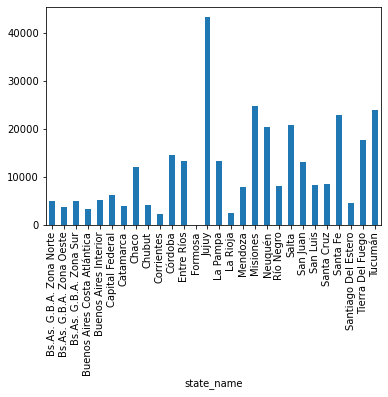

In [4]:
#graficamos el dato por Estado con el fin de observar los rangos de precios por metro cuadrado
#En esta grafica podemos observar la variación en la media de las areas que existen de acuerdo al Estado.
data.groupby('state_name')['price_per_m2'].mean().plot.bar()

In [6]:
# Al visualizar esta grafica podemos observar como en esta columna existen valores extremos y al revisar los datos vemos que son errores
#en algunos casos los valores de metros cuadrados son los mismos valores_aprox en dolares o pesos.

import plotly.express as px
fig = px.scatter_3d(data, x='lat', y='lon', z='price_per_m2',
                    color='property_type')
fig.show()

In [22]:
#vamos a identificar los casos para poder corregirlos o eliminarlos de acuerdo con la observación.
# En algunos casos los valores por metro cuadrado son los mismos precios aprox en u$d o en $, lo que evidencia un error en el dato.
#Hay 41 registros que tienen valores suoperiores a u$d400.000 por metro cuadrado cubierto

#####  Qué hacemos con estos registros?????#######

data[data.price_per_m2>=400000]

Unnamed: 0 operation property_type              place_name  \
349            349      sell     apartment                 Córdoba   
7416          7416      sell         house              San Isidro   
8170          8170      sell         house        Fincas de Iraola   
8396          8396      sell         house               Caballito   
10528        10528      sell         house                 Córdoba   
17571        17571      sell         house                   Tigre   
17572        17572      sell         house                   Tigre   
17575        17575      sell         house                   Tigre   
17576        17576      sell         house                   Tigre   
18451        18451      sell         house                   Tigre   
28550        28550      sell         store                 Palermo   
33190        33190      sell     apartment           Puerto Madero   
38931        38931      sell         store              Marcos Paz   
42575        42575      sell         house            Monte Castro   
45433        45433      sell         house  Villa General Belgrano   
48473        48473      sell         house               Versalles   
49274        49274      sell     apartment        Villa Carlos Paz   
53324        53324      sell     apartment        Villa Carlos Paz   
54148        54148      sell     apartment       Rincón de Milberg   
55123        55123      sell         house        Villa Santa Rita   
55181        55181      sell     apartment                 Córdoba   
58009        58009      sell         store              Hurlingham   
58062        58062      sell         store                 Quilmes   
63886        63886      sell         house                Misiones   
64131        64131      sell     apartment                   Nuñez   
64132        64132      sell         store                   Nuñez   
64134        64134      sell     apartment                   Nuñez   
64135        64135      sell     apartment                   Nuñez   
64136        64136      sell     apartment                   Nuñez   
64137        64137      sell         store                   Nuñez   
65701        65701      sell         store               Llavallol   
73058        73058      sell         store                   Lanús   
73523        73523      sell         house                   Lanús   
75360        75360      sell         house                   Lanús   
76249        76249      sell     apartment              Colegiales   
76250        76250      sell     apartment              Colegiales   
87571        87571      sell         store                Martínez   
95567        95567      sell         house                   Pilar   
110750      110750      sell         house            Villa Devoto   
112999      112999      sell     apartment              Colegiales   
116956      116956      sell         house                   Pilar   

                                  place_with_parent_names country_name  \
349                           |Argentina|Córdoba|Córdoba|    Argentina   
7416    |Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...    Argentina   
8170    |Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...    Argentina   
8396                |Argentina|Capital Federal|Caballito|    Argentina   
10528                         |Argentina|Córdoba|Córdoba|    Argentina   
17571          |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|    Argentina   
17572          |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|    Argentina   
17575          |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|    Argentina   
17576          |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|    Argentina   
18451    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|    Argentina   
28550                 |Argentina|Capital Federal|Palermo|    Argentina   
33190           |Argentina|Capital Federal|Puerto Madero|    Argentina   
38931   |Argentina|Bs.As. G.B.A. Zona Oeste|Marcos Paz...    Argentina   
42575            |Argentina|Cap

In [23]:
data.price_per_m2.describe()

count              87,658.0
mean     6,912.215704519683
std     28,378.644733892193
min      1.5102040816326532
25%                 1,550.0
50%      2,213.114754098361
75%     3,355.5486111111113
max            3,999,999.96
Name: price_per_m2, dtype: float64

Detalle de análisis de columnas:
* `price_per_m2` -> Esta columna tiene 33.562 datos nulos o su equivalente 27.68%. Consideramos que esta variable es relevante para la proyección, y podriamos completarla realizando diferentes operaciones:
Los datos tienen un valor máximo de 3,999,999 dolares por metro cuadrado, frente a una media de 6,912 dolares por metro cuadrado.

1. calculando la mediana del valor m2 cubierto de acuerdo con el place name

### Detalle de valores extremos en la  columna `price_per_m2`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar 10 datos que se alejan significativamente de la media principalmente en el tipo de propiedad apartamentos.

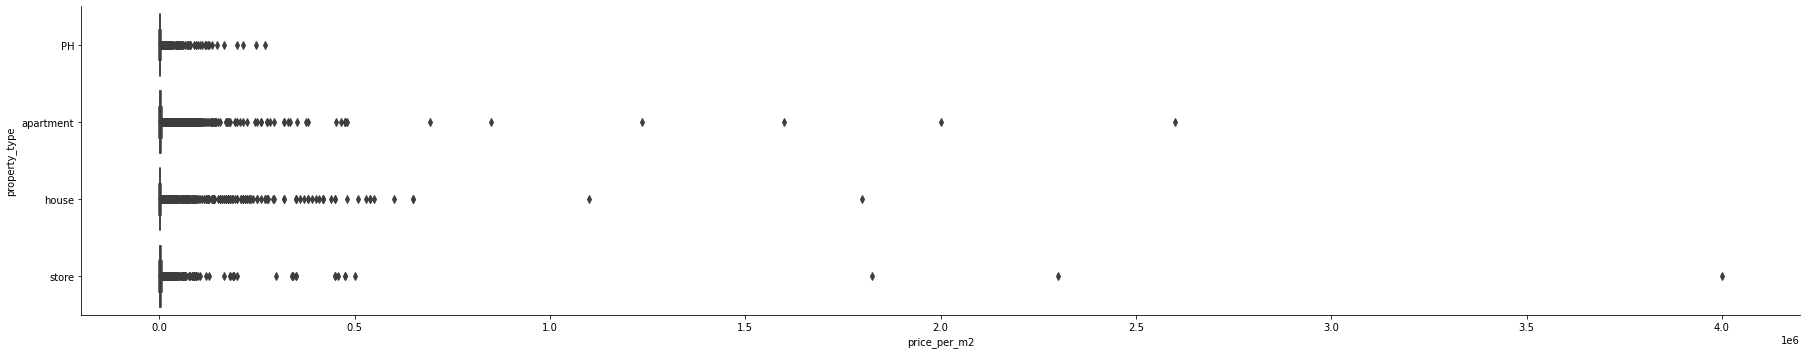

In [24]:
sns.catplot(data=data, x= 'price_per_m2', y="property_type", kind="box", height=5, aspect=5,)


### Completar la columna `price_per_m2` con la mediana por place name:

Hemos decidido emplear la mediana teniendo en cuenta que en los datos se encuentran valores extremos significativos que podrian afectar la proyección de los datos.

In [25]:
#vamos a extraer la mediana de el precio por m2 por place name

mediana_precio_place_name = data.groupby('place_name').price_per_m2.median()

mediana_precio_place_name.head()

place_name
 Country Maschwitz Club   1,230.7692307692307
 los alamos               1,990.2439024390244
9 de Abril                              687.5
Abasto                     2,303.030303030303
Abril Club de Campo        1,808.695652173913
Name: price_per_m2, dtype: float64

In [26]:
print(type(mediana_precio_place_name))

<class 'pandas.core.series.Series'>


In [27]:
mediana_precio_place_name.index

Index([' Country Maschwitz Club', ' los alamos', '9 de Abril', 'Abasto',
       'Abril Club de Campo', 'Acacias Blancas', 'Acassuso', 'Achiras',
       'Adolfo Alsina', 'Adrogué',
       ...
       'Virreyes', 'Vistalba', 'Wenceslao Escalante', 'Wilde',
       'William Morris', 'Yerba Buena', 'Zelaya', 'Zárate',
       'coordenadas 34.255511', 'Álvarez'],
      dtype='object', name='place_name', length=1060)

In [28]:
mediana_precio_place_name.values

array([1230.76923077, 1990.24390244,  687.5       , ..., 1349.01873327,
       2301.25523013,           nan])

In [32]:
#vamos a construir un dataframe con las columnas place_name y price_per_m2

mediana_precio_place_name_df = pd.DataFrame(mediana_precio_place_name)

mediana_precio_place_name_df.head(5)

price_per_m2
place_name                                 
 Country Maschwitz Club 1,230.7692307692307
 los alamos             1,990.2439024390244
9 de Abril                            687.5
Abasto                   2,303.030303030303
Abril Club de Campo      1,808.695652173913

In [33]:
#vamos a resetear el indice para que place_name se convierta en columna

mediana_precio_place_name_df.reset_index(inplace=True)
mediana_precio_place_name_df.head(5)

place_name        price_per_m2
0   Country Maschwitz Club 1,230.7692307692307
1               los alamos 1,990.2439024390244
2               9 de Abril               687.5
3                   Abasto  2,303.030303030303
4      Abril Club de Campo  1,808.695652173913

In [34]:
#vamos a crear una columna con los valores de la mediana del precio por m2 para cada place_name
data = data.merge(mediana_precio_place_name_df, on = "place_name", suffixes = ("", "_median"), how = 'left')
data.head(5)

Unnamed: 0 operation property_type place_name  \
0           0      sell            PH  Mataderos   
1           1      sell     apartment   La Plata   
2           2      sell     apartment  Mataderos   
3           3      sell            PH    Liniers   
4           4      sell     apartment     Centro   

                             place_with_parent_names country_name  \
0              |Argentina|Capital Federal|Mataderos|    Argentina   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   
2              |Argentina|Capital Federal|Mataderos|    Argentina   
3                |Argentina|Capital Federal|Liniers|    Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   

                     state_name  geonames_id                  lat-lon  \
0               Capital Federal  3,430,787.0  -34.6618237,-58.5088387   
1        Bs.As. G.B.A. Zona Sur  3,432,039.0  -34.9038831,-57.9643295   
2               Capital Federal  3,430,787.0  -34.6522615,-58.5229825   
3               Capital Federal  3,431,333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica  3,435,548.0  -38.0026256,-57.5494468   

          lat  ...    price_usd_per_m2        price_per_m2 floor  rooms  \
0 -34.6618237  ... 1,127.2727272727273             1,550.0   nan    nan   
1 -34.9038831  ...                 nan                 nan   nan    nan   
2 -34.6522615  ...  1,309.090909090909  1,309.090909090909   nan    nan   
3 -34.6477969  ...                 nan                 nan   nan    nan   
4 -38.0026256  ... 1,828.5714285714291 1,828.5714285714291   nan    nan   

   expenses                                      properati_url  \
0       nan  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1       nan  http://www.properati.com.ar/15bob_venta_depart...   
2       nan  http://www.properati.com.ar/15bod_venta_depart...   
3       nan  http://www.properati.com.ar/15boh_venta_ph_lin...   
4       nan  http://www.properati.com.ar/15bok_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote...   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                       PH 3 amb. cfte. reciclado      
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...   

                                     image_thumbnail  price_per_m2_median  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...  1,786.4314789687924  
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...   1,666.666666666667  
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...  1,786.4314789687924  
3  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...  2,156.8627450980393  
4  https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...  1,978.4722222222222  

[5 rows x 27 columns]

In [35]:
#vamos a reemplazar los nan de la columna price_per_m2 por la mediana calculada para cada place_name

data.price_per_m2.fillna(data.price_per_m2_median, inplace = True)

data.head(5)

Unnamed: 0 operation property_type place_name  \
0           0      sell            PH  Mataderos   
1           1      sell     apartment   La Plata   
2           2      sell     apartment  Mataderos   
3           3      sell            PH    Liniers   
4           4      sell     apartment     Centro   

                             place_with_parent_names country_name  \
0              |Argentina|Capital Federal|Mataderos|    Argentina   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   
2              |Argentina|Capital Federal|Mataderos|    Argentina   
3                |Argentina|Capital Federal|Liniers|    Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   

                     state_name  geonames_id                  lat-lon  \
0               Capital Federal  3,430,787.0  -34.6618237,-58.5088387   
1        Bs.As. G.B.A. Zona Sur  3,432,039.0  -34.9038831,-57.9643295   
2               Capital Federal  3,430,787.0  -34.6522615,-58.5229825   
3               Capital Federal  3,431,333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica  3,435,548.0  -38.0026256,-57.5494468   

          lat  ...    price_usd_per_m2        price_per_m2 floor  rooms  \
0 -34.6618237  ... 1,127.2727272727273             1,550.0   nan    nan   
1 -34.9038831  ...                 nan  1,666.666666666667   nan    nan   
2 -34.6522615  ...  1,309.090909090909  1,309.090909090909   nan    nan   
3 -34.6477969  ...                 nan 2,156.8627450980393   nan    nan   
4 -38.0026256  ... 1,828.5714285714291 1,828.5714285714291   nan    nan   

   expenses                                      properati_url  \
0       nan  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1       nan  http://www.properati.com.ar/15bob_venta_depart...   
2       nan  http://www.properati.com.ar/15bod_venta_depart...   
3       nan  http://www.properati.com.ar/15boh_venta_ph_lin...   
4       nan  http://www.properati.com.ar/15bok_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote...   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                       PH 3 amb. cfte. reciclado      
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...   

                                     image_thumbnail  price_per_m2_median  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...  1,786.4314789687924  
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...   1,666.666666666667  
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...  1,786.4314789687924  
3  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...  2,156.8627450980393  
4  https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...  1,978.4722222222222  

[5 rows x 27 columns]

In [37]:
#luego de reemplazar los valores por la mediana por place name se logran reducir el porcentaje de nans al pasar del 43.39% al 0.3283%.
print (f'% de valores nulos que quedan luego de remplazar por la mediana por place_name: {data.price_per_m2.isna().sum()/data.price_per_m2.shape[0]*100}')
print (f'entradas: {data.price_per_m2.shape[0]}')

% de valores nulos que quedan luego de remplazar por la mediana por place_name: 0.3283286586371886
entradas: 121220
